# Medical Insurance Cost Prediction

## Problem Statement:- Can you accurately predict insurance cost?
If the given columns are


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
pwd

'C:\\Users\\HP\\Documents\\DS-ML-IOT\\mini project\\Linear regession'

In [4]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Understanding the data set

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [316]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [317]:
data.describe(include= 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [318]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [319]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

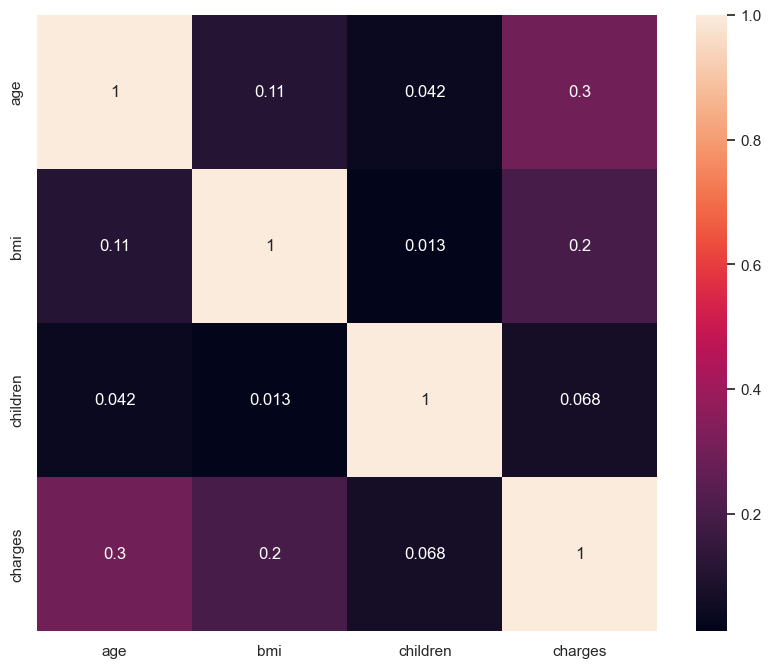

In [320]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot=True)

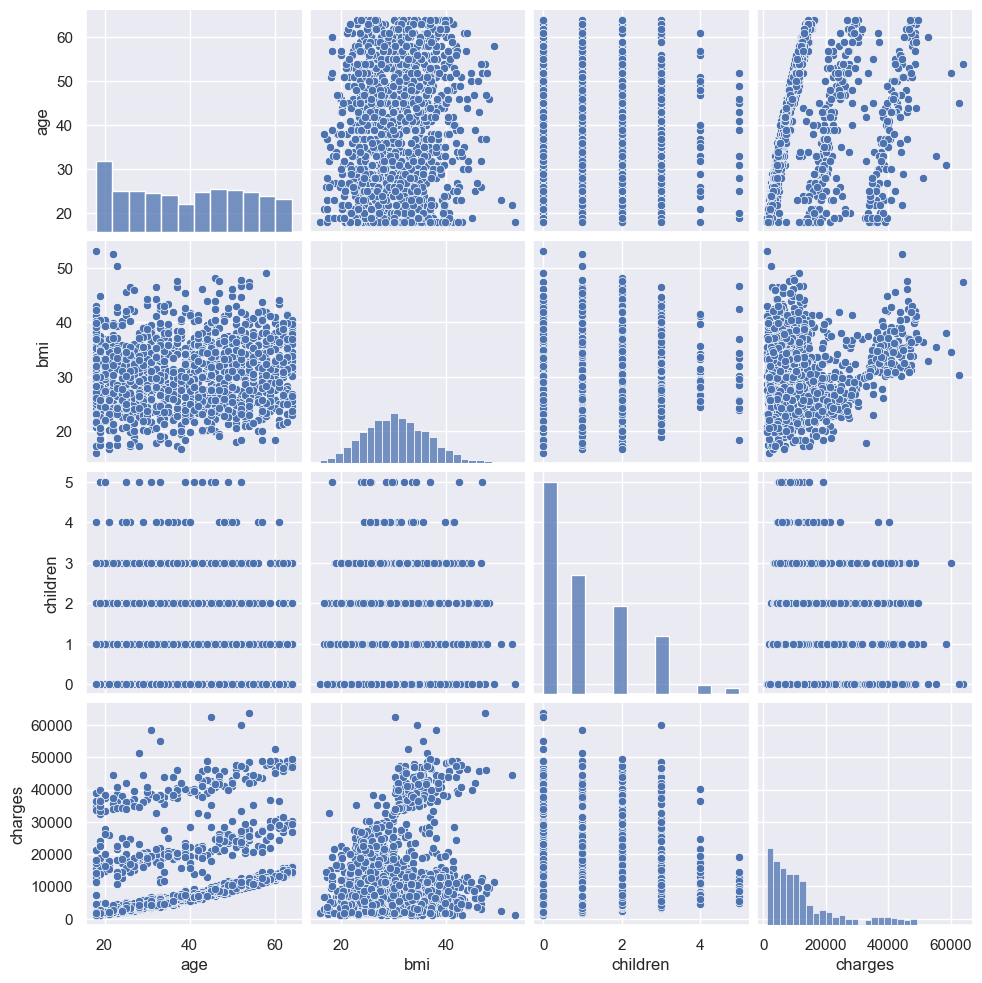

In [321]:
sns.pairplot(data)

### Insight

In the datset total 1338 rows and 7 columns are present out of which 6( age, sex, bmi, children, smoker, region) are independent and 1 (charges) is dependent. Float, int and object datatype is present. There is no null value is present. From the describe function we can see that outlies are present in charges column but it are independent column.

### Analysing "Age" column

In [211]:
data['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

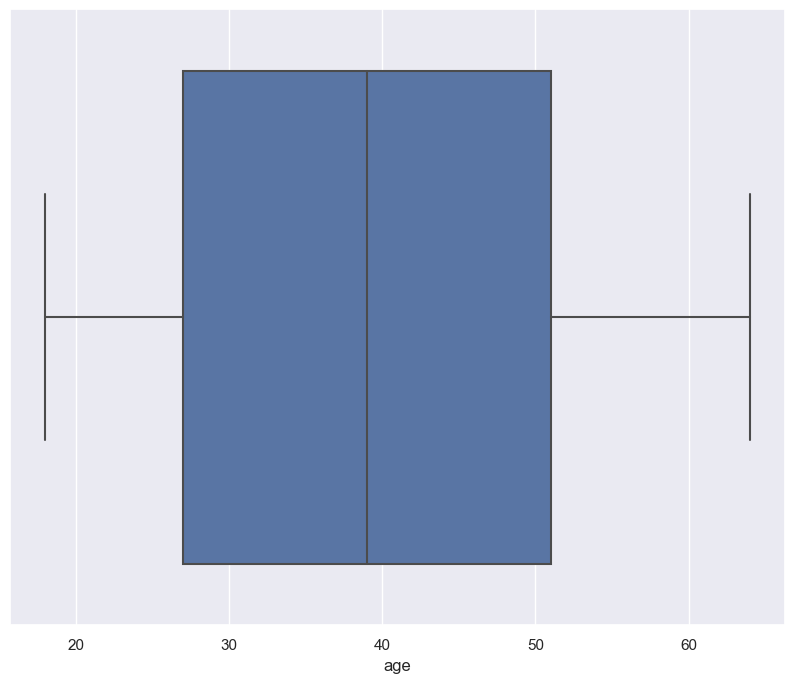

In [212]:
sns.boxplot(data['age'])

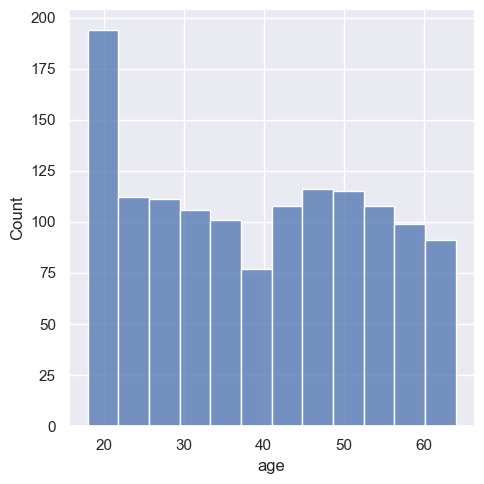

In [213]:
sns.displot(data['age'],kind='hist')

In [214]:
data['age'].skew() # we can say no skewness or slight skewness is present

0.05567251565299186

### Insight

In the age column we have minimum age is 18 and maximium age is 64. In box plot we can see no outlier is present. As no outlier is present, so no skewness is present. This column is prefect for are model.

### Analysing "Sex" column

In [215]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

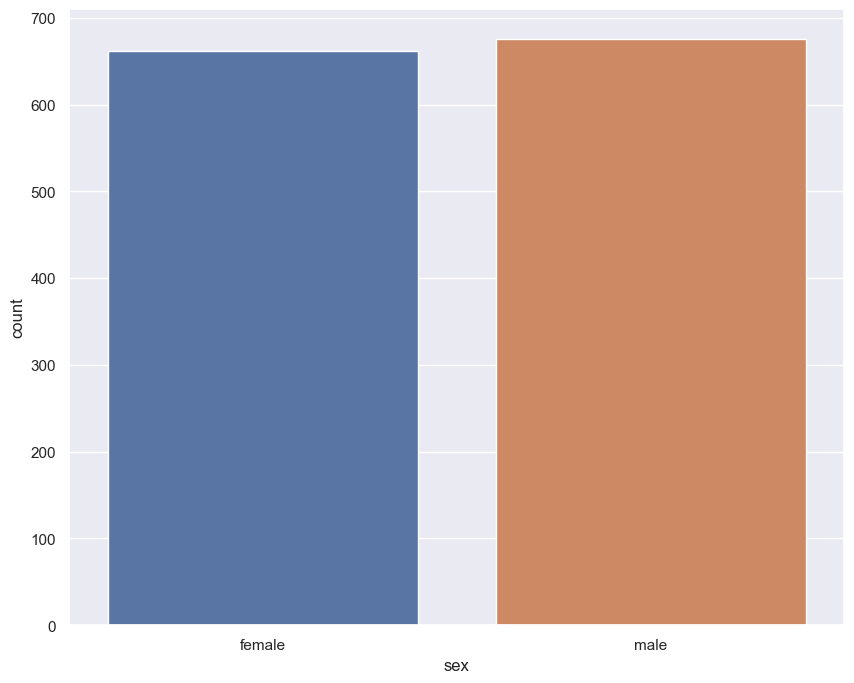

In [216]:
sns.countplot(x = 'sex' , data = data)

### Insight 

In the sex column, we have 2 categories "Male" and "Female". We have to just convert categorial to numerical than we can in the model.

### Analysing the "Bmi" column 

In [322]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

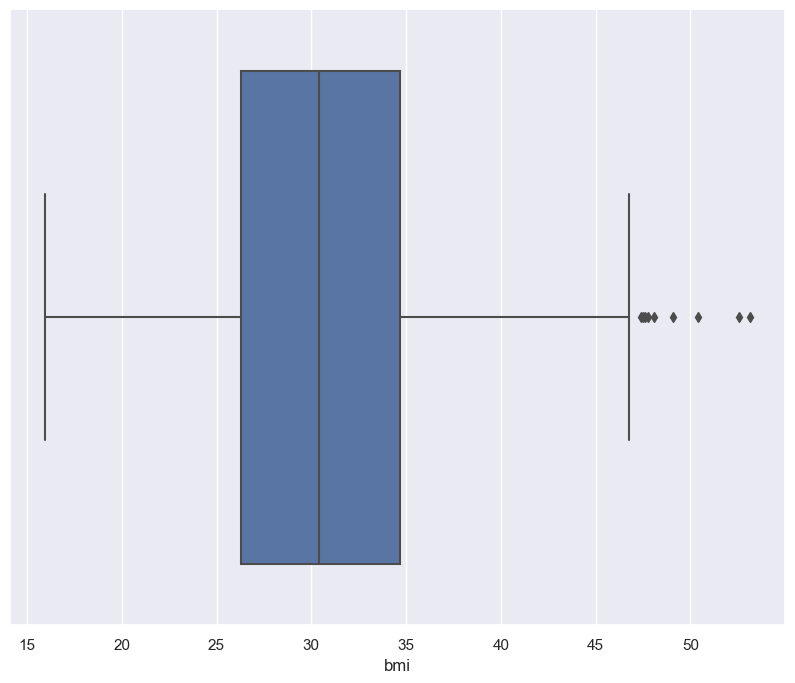

In [323]:
sns.boxplot(data['bmi'])

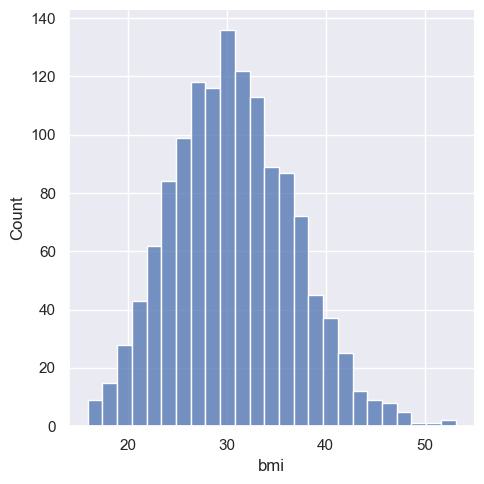

In [324]:
sns.displot(data['bmi'],kind='hist')

In [325]:
data['bmi'].skew()#slight Skewed

0.2840471105987448

In [326]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR


lower_limit = Q1 - 1.5 * IQR

# Display the upper and lower limits
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 47.290000000000006
Lower Limit: 13.7


In [327]:
len(data[(data['bmi'] > 47.290000000000006) | (data['bmi'] < 13.7)]['bmi'])

9

In [328]:
mode=data['bmi'].mode()[0]
mode

32.3

In [329]:
data.loc[((data['bmi'] > 47.290000000000006) | (data['bmi'] < 13.7)),'bmi']= mode

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

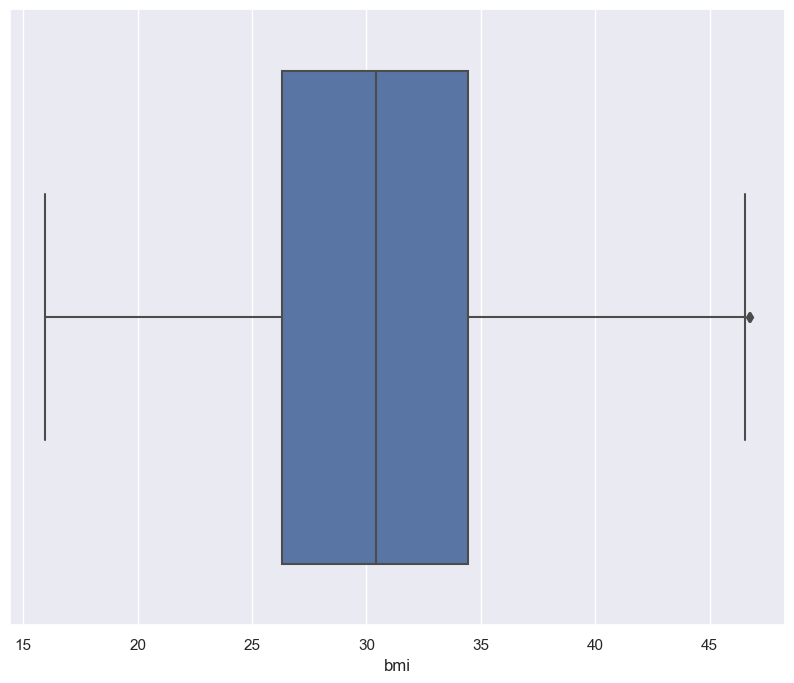

In [330]:
sns.boxplot(data['bmi'])

In [331]:
len(data[(data['bmi'] > 47.290000000000006) | (data['bmi'] < 13.7)]['bmi'])

0

### Insight

In the bmi column,it is numerial datatype. From the box plot, we can see some outliers are, also we can see by skewness it is slightly skewness. So to remove the outliers I have used the IQR method, through this I find the upper limit and lower limit. when we apply this limit with the len function we can see 9 outliers are present. So I have replaced this 9 outlier with a mode of sex column which is 32.3. After replacing outliers we can see no outliers are present. Now this column is perfect for are model

### Analysing "Children" column 

In [228]:
data['children'].value_counts()

0    571
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

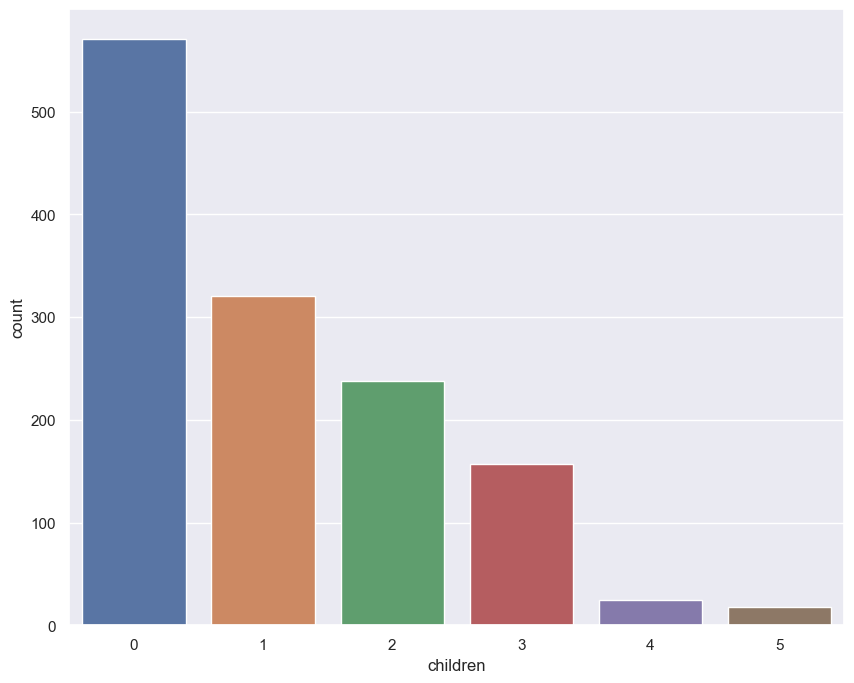

In [229]:
sns.countplot(x = 'children' , data = data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

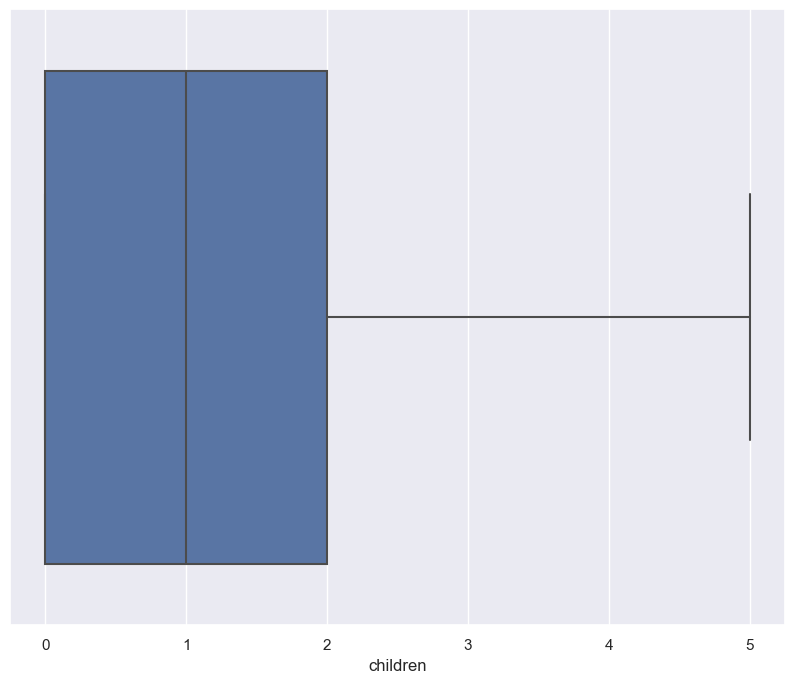

In [230]:
sns.boxplot(data['children'])

### Insight 

In the children we have 6 categories (0,1,2,3,4,5). From box plot we can see that no outlier are present. This column is prefect for are model

### Analysing the "Smoker" column 

In [231]:
data['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

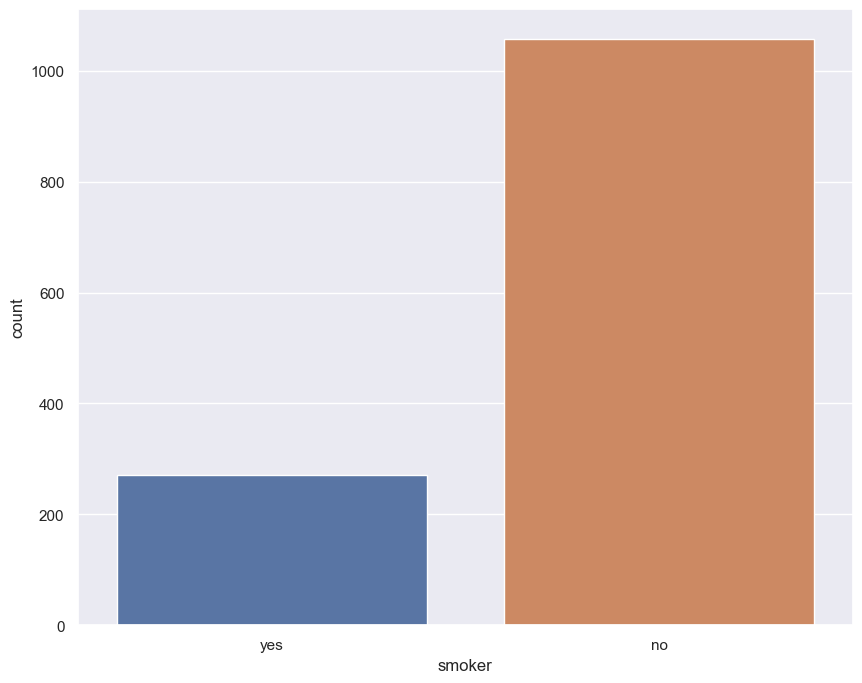

In [232]:
sns.countplot(x = 'smoker' , data = data)

### Insight

In the smoker column we have categorial "Yes" and "No". We have to just convert categorial to numerical than we can in the model.

### Analysing the "Region" Column 

In [233]:
data['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

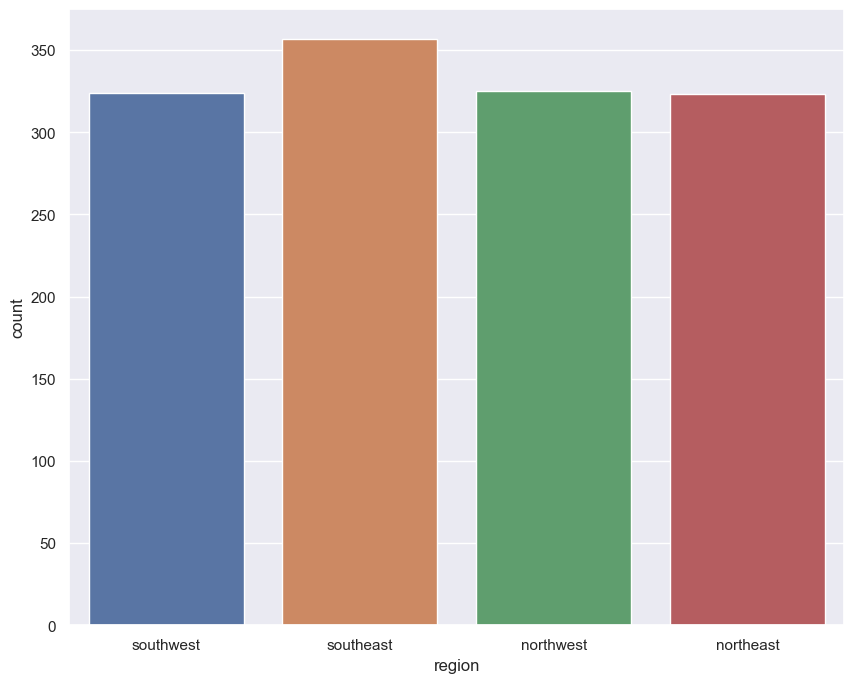

In [234]:
sns.countplot(x = 'region' , data = data)

### Analysing the "Charges" column  

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

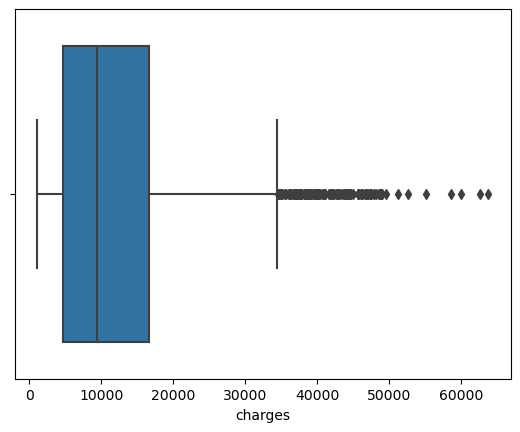

In [5]:
sns.boxplot(data['charges'])

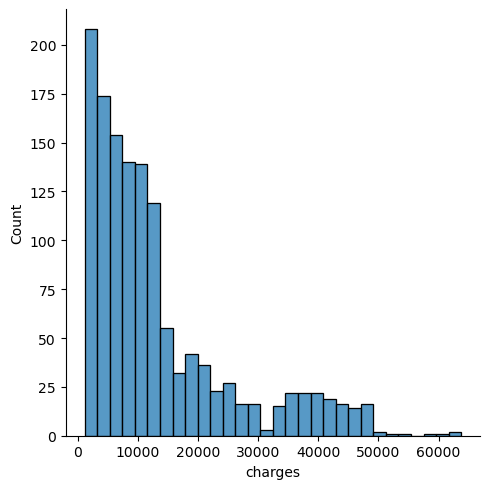

In [6]:
sns.displot(data['charges'],kind='hist')

In [7]:
data['charges'].skew()#highly Skewed

1.5158796580240388

In [8]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

upper_limit_charges = Q3 + 1.5 * IQR


lower_limit_charges = Q1 - 1.5 * IQR

# Display the upper and lower limits
print("Upper Limit:", upper_limit_charges)
print("Lower Limit:", lower_limit_charges)

Upper Limit: 34489.350562499996
Lower Limit: -13109.1508975


In [9]:
df2=len(data[(data['charges'] > 34489.350562499996) | (data['charges'] < 0)]['charges'])
df2

139

In [10]:
df2 = data[(data['charges'] > 34489.350562499996) | (data['charges'] < 0)].index
data.drop(df2, axis=0, inplace=True)

In [11]:
#mode1=data['charges'].mode()[0]
#mode1

In [12]:
#data.loc[((data['charges'] > 34489.350562499996) | (data['charges'] < -13109.1508975)),'charges']= mode1

In [13]:
len(data[(data['charges'] > 34489.350562499996) | (data['charges'] < 0)]['charges'])

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

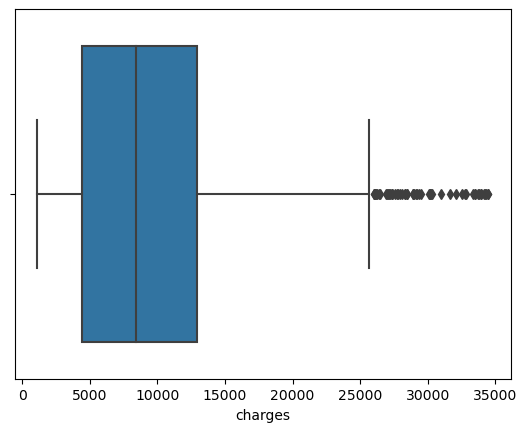

In [14]:
sns.boxplot(data['charges'])

In [15]:
data.shape

(1199, 7)

### Converting Categorical Column into Numerical Column 

In [22]:
data['sex'] = data.sex.factorize()[0]
data['smoker'] = data.smoker.factorize()[0]
data['region'] = data.region.factorize()[0]

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


### Insight

We have converted categorical data into numerial dt

#### Independent variable

In [24]:
cols= ['age','sex','bmi','children','smoker','region']
X= data[cols]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2
1334,18,0,31.920,0,1,3
1335,18,0,36.850,0,1,1
1336,21,0,25.800,0,1,0


#### Dependent variable

In [25]:
y= data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((936, 6), (936,), (402, 6), (402,))

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [28]:
scaler= StandardScaler()
scaler

StandardScaler()

In [29]:
X_train= scaler.fit_transform(X_train)
X_train

array([[-0.00557145,  0.97467943, -0.75363727, -0.07947937,  0.52625475,
         0.48302285],
       [ 0.48772736, -1.02597835,  0.77662592, -0.9248509 , -1.90022037,
         1.39269969],
       [-0.49887026,  0.97467943, -0.48818345, -0.07947937,  0.52625475,
         0.48302285],
       ...,
       [-1.48546788,  0.97467943, -0.12739637, -0.07947937,  0.52625475,
        -0.42665399],
       [ 1.75621002,  0.97467943, -1.15798178, -0.9248509 , -1.90022037,
        -0.42665399],
       [-0.49887026, -1.02597835, -0.17588484, -0.9248509 ,  0.52625475,
         0.48302285]])

In [30]:
X_test= scaler.fit_transform(X_test)
X_test

array([[ 0.32821471,  1.02519286, -0.09794322,  0.71947799,  0.46314308,
         1.32669466],
       [-1.57023584, -0.97542622,  1.62762988, -0.87407657,  0.46314308,
         1.32669466],
       [-0.54799324,  1.02519286, -0.36222019,  2.31303256, -2.15915998,
         0.43033961],
       ...,
       [ 1.20442266, -0.97542622,  1.17434989,  0.71947799,  0.46314308,
        -0.46601544],
       [-1.57023584, -0.97542622,  1.9483623 , -0.87407657, -2.15915998,
        -0.46601544],
       [-1.42420119, -0.97542622,  1.09089401,  3.10980984,  0.46314308,
        -1.36237048]])

## Linear Regression Model

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 8019.0467885  13790.03322216  9514.31095073  5183.25416399
 17230.40336647  6287.838233   14008.27405535  9504.47319174
  3952.59502053 11985.12812088  6034.41512877  9354.7275257
  7778.46867319 25722.05593558  4195.55373345 14236.99950974
 13891.48907962  5882.32182663  7574.17248938 10179.03346838
 17041.64571542  9589.09128094 10324.90684128 10068.53066127
 18050.15530675  8654.46696435 11600.32789851  7190.38599605
 14036.08856073 13451.03245386 11876.57193973  9222.58504694
 11478.82999511  2811.94300883 10689.8905815  12705.3827156
  4802.32975745  7758.69642188  3856.44725675 11928.51845937
  7765.96029177 10813.27983329  7304.26563531  3983.88871895
  6818.32967512  8143.9372501   9876.21567658 11406.11677707
  4052.01965241  3629.61040084 12441.30940845  7495.72230776
  5468.40060962  2916.44761037  6636.99968823 11489.89982609
  9439.18388132 17821.74004869  8336.2918447   8959.40232432
  4624.428416   10089.41894412  6330.72585866 10380.69669605
  9204.74373973 20163.2625

### print the cofficients and the intercept

In [90]:
print(regressor.intercept_)

13554.73261695406


In [97]:
print(regressor.coef_)

[ 3679.04950268   -30.22720036  2143.15160168   370.1476016
 -9899.66537054   265.98595274]


### Assumption of linear regression

Text(0, 0.5, 'Predicated Data')

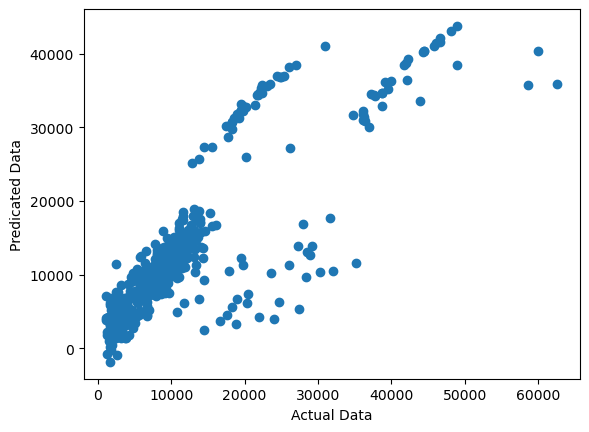

In [98]:
test_data_prediction =regressor.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicated Data")

In [69]:
residuals= y_test-test_data_prediction
residuals

936     21553.074218
728     -4522.281318
1307   -11604.467140
924      -439.570160
137      -172.472617
            ...     
78      -4892.815041
698     -3373.992604
302     -3824.048559
803      5882.337801
166     -2055.587352
Name: charges, Length: 402, dtype: float64

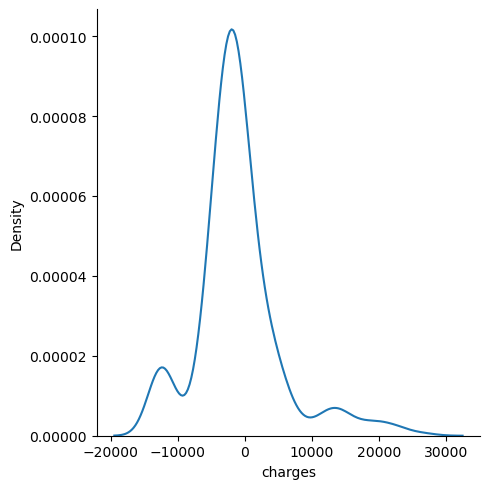

In [70]:
sns.displot(residuals, kind="kde")

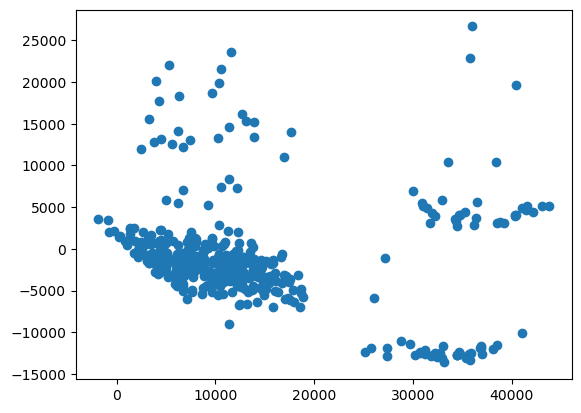

In [71]:
plt.scatter(test_data_prediction,residuals)

### Preformance Metrics

In [94]:
# RMSE= Root mean squard mean
rmse_linear=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_linear)

6501.879289212892


In [95]:
#R squared value
score1=r2_score(y_test,y_pred)
print(score1)

0.6827758636699681


In [96]:
#Adjusted R squred
r_adj_linear=1-(1-score1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_adj_linear)

0.677957269194069


# Ridge Regression Model

In [75]:
from sklearn.linear_model import Ridge

In [31]:
ridge= Ridge()
ridge

Ridge()

In [32]:
ridge.fit(X_train,y_train)

Ridge()

### print the cofficients and the intercept

In [33]:
print(ridge.coef_)

[ 3675.10971058   -29.1416868   2141.22468795   370.17911415
 -9888.93788079   265.41629466]


In [34]:
print(ridge.intercept_)

13554.73261695406


### Assumption of Ridge regression

In [35]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([10559.83236588,  6746.05883587, 33057.5811233 ,  6698.07883277,
        2230.62868957,  2496.83255114,  3505.72395623, 18704.5057449 ,
        9738.04421904, 35695.7108252 , 10177.06512456, 12066.4755379 ,
        9617.53015735,  3736.48506595,  4796.89668774,  3334.05943624,
        7366.81770715, 13013.33365136,  4249.54549845, 12621.45779977,
       10760.12931544,  5750.29681958, 13794.98121184, 12590.26536159,
       30867.2123822 ,   841.64132576, 14397.2192125 , 14216.79337716,
        7995.67383548, 13545.12771689,  8780.9334841 ,  5255.48870778,
       35693.33917433, 38777.48965146,  9582.31522937,  6236.76973   ,
        7518.79831868, 10324.70799678,  8046.10807093, 43043.24159147,
        3772.39166526,  6412.13556282, 15652.45861474, 35313.00588529,
        3347.95331163,  8705.99757858, 10722.69012464, 34615.71240668,
       17461.17283944, 10359.70715607, 13828.82802182, 36303.81086011,
        8830.96839081, 36763.4830765 , 16933.17336173,  2448.1536821 ,
      

Text(0, 0.5, 'Predicated Data')

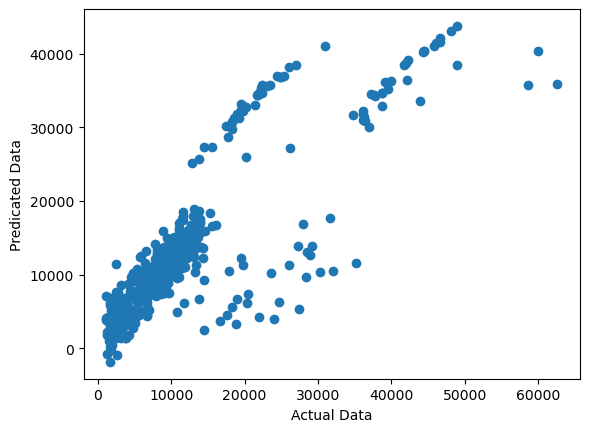

In [99]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicated Data")

In [100]:
residuals= y_test - ridge_pred
residuals

936     21548.830454
728     -4528.457636
1307   -11585.102323
924      -447.643833
137      -184.943440
            ...     
78      -4897.990443
698     -3373.986570
302     -3821.238179
803      5903.889005
166     -2063.879957
Name: charges, Length: 402, dtype: float64

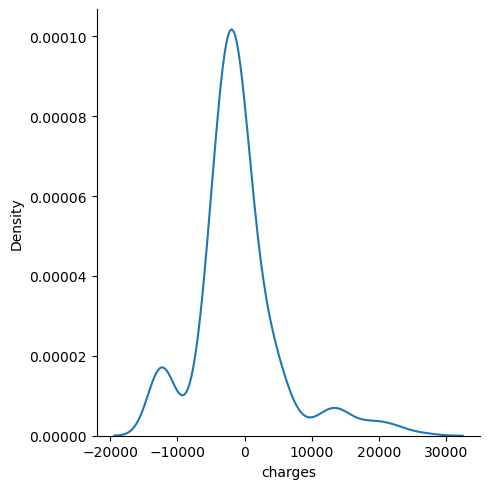

In [101]:
sns.displot(residuals,kind="kde")

### Preformance Metrics

In [102]:
# RMSE= Root mean squard mean
rmse_ridge=np.sqrt(mean_squared_error(y_test,ridge_pred))
print(rmse_ridge)

6500.010798897115


In [103]:
#R squared value
score2=r2_score(y_test,ridge_pred)
print(score2)

0.6829581632888309


In [104]:
#Adjusted R squred
r_adj_ridge=1-(1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_adj_ridge)

0.6781423379210663


# Lasso Regression Model

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso=Lasso()
lasso

Lasso()

In [45]:
lasso.fit(X_train,y_train)

Lasso()

### print the cofficients and the intercept

In [105]:
print(lasso.coef_)

[ 3678.23738276   -29.02164226  2142.00872163   369.19224649
 -9898.57228831   264.77103287]


In [106]:
print(lasso.intercept_)

13554.73261695406


### Assumption of Lasso regression

In [107]:
lasso_pred= lasso.predict(X_test)
lasso_pred

array([10554.87698782,  6737.85109832, 33073.94814451,  6695.36442837,
        2222.21504769,  2491.01841979,  3498.68673858, 18708.12445536,
        9733.17541944, 35714.66964357, 10175.20441082, 12063.22637961,
        9616.55182304,  3726.9493846 ,  4784.39798987,  3322.71502926,
        7359.46975568, 13012.23504268,  4240.42363426, 12620.5384589 ,
       10757.21107258,  5743.23635815, 13793.33732942, 12586.31240281,
       30883.94397328,   833.39822323, 14395.50419903, 14216.8171196 ,
        7993.05943246, 13545.1495589 ,  8776.23469191,  5249.64376094,
       35716.70585071, 38802.16207136,  9577.29198584,  6230.22855082,
        7515.09848968, 10319.79536241,  8040.11706382, 43071.8164705 ,
        3765.07793736,  6402.53739357, 15653.90266026, 35336.01939695,
        3339.29693144,  8699.74264881, 10718.16822758, 34635.44681617,
       17464.61015836, 10353.78132401, 13825.88173521, 36323.93456894,
        8825.51008572, 36783.90679942, 16933.8658033 ,  2437.89966816,
      

Text(0, 0.5, 'Predicated Data')

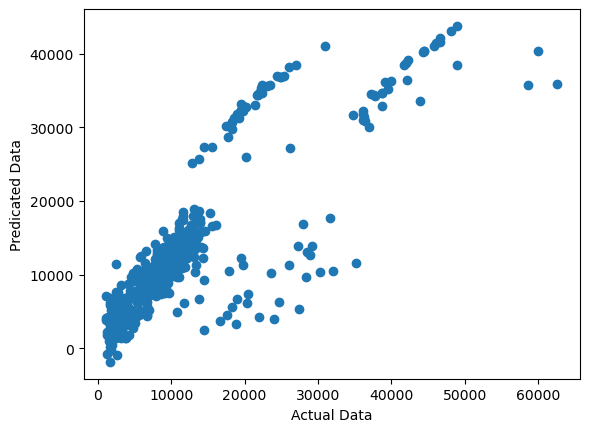

In [108]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicated Data")

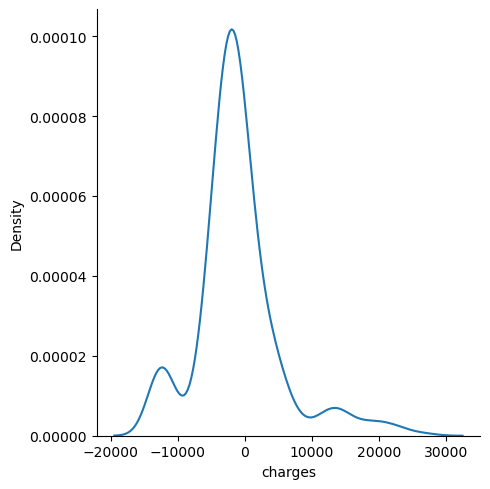

In [109]:
residuals= y_test - lasso_pred
residuals
sns.displot(residuals,kind="kde")

### Preformance Metrics

In [110]:
# RMSE= Root mean squard mean
rmse_lasso=np.sqrt(mean_squared_error(y_test,lasso_pred))
print(rmse_lasso)

6501.8135895615505


In [111]:
#R squared value
score3=r2_score(y_test,lasso_pred)
print(score3)

0.6827822745579368


In [112]:
#Adjusted R squred
r_adj_lasso=1-(1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_adj_lasso)

0.6779637774626144


# Elastic Net Regression Model 

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
elastic = ElasticNet()
elastic

ElasticNet()

In [53]:
elastic.fit(X_train,y_train)

ElasticNet()

### print the cofficients and the intercept

In [113]:
print(elastic.coef_)

[ 2452.65350665   199.52575366  1511.82162604   337.5229788
 -6572.91312156   113.76151467]


In [114]:
print(elastic.intercept_)

13554.732616954061


### Assumption of Elastic regression

In [54]:
elastic_pred= elastic.predict(X_test)
elastic_pred

array([11765.77720646,  8781.25822497, 26889.26385435,  9126.20461024,
        6057.93674952,  6284.46983151,  6424.45367509, 17329.76882102,
       10823.20459609, 28073.92615383, 11377.8808776 , 12748.10755888,
       11123.60172003,  7114.22072137,  7647.76167796,  6609.86261982,
        9944.90143689, 12822.19151155,  7018.58339946, 13327.58853785,
       11538.18877351,  8624.95885123, 13646.60093743, 12717.50994528,
       25048.01108295,  4800.05002383, 13986.65434855, 14316.91699597,
        9600.43084973, 13242.90953665, 10105.90723682,  8315.28157875,
       28192.38052102, 30583.41092474, 11290.65606378,  8382.25716044,
        9336.39922534, 11128.28387684, 10119.24263009, 33538.30274052,
        7222.89167277,  8625.32448052, 14678.89418998, 28168.43974967,
        6437.63363129, 10744.59646731, 11861.60895872, 27217.95727044,
       16087.95485988, 11353.95586812, 14117.50139685, 28536.53142365,
       10534.72355409, 28720.80406032, 16347.91743836,  5882.16025972,
      

Text(0, 0.5, 'Predicated Data')

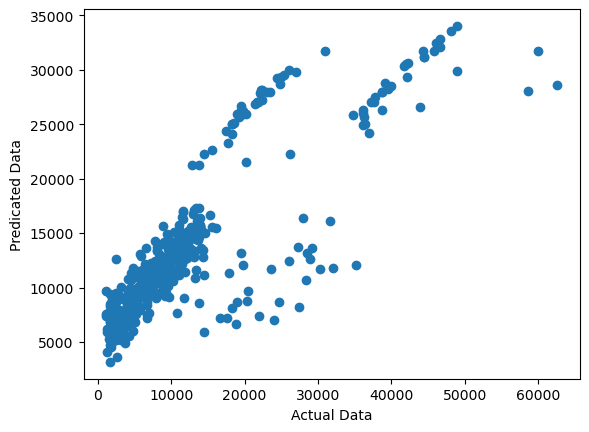

In [115]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicated Data")

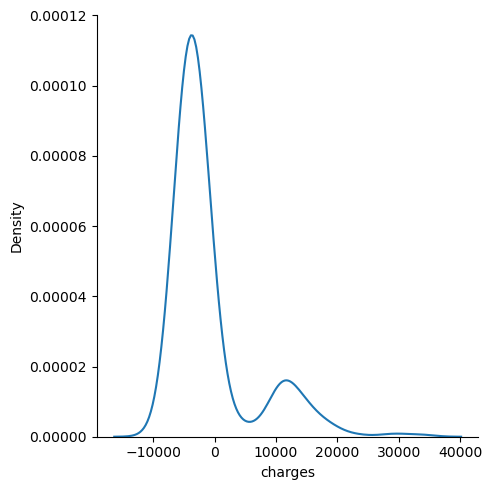

In [116]:
residuals= y_test - elastic_pred
residuals
sns.displot(residuals,kind="kde")

### Preformance Metrics

In [117]:
# RMSE= Root mean squard mean
rmse_elastic=np.sqrt(mean_squared_error(y_test,elastic_pred))
print(rmse_elastic)

6891.7458584023825


In [118]:
#R squared value
score4=r2_score(y_test,elastic_pred)
print(score4)

0.6435924241831753


In [119]:
#Adjusted R squred
r_adj_elastic=1-(1-score4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_adj_elastic)

0.6381786382214008


## Comparison

In [120]:
matrix_data = np.matrix([[score1, r_adj_linear, rmse_linear],
                         [score2, r_adj_ridge, rmse_ridge],
                         [score3, r_adj_lasso, rmse_lasso],
                         [score4, r_adj_elastic, rmse_elastic]])

row_labels = ['Linear', 'Ridge', 'Lasso', 'Elastic']
column_headings = ['R_squared', 'R_Adjusted', 'RMSE']
#matrix_data
df6 = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
df6

,R_squared,R_Adjusted,RMSE
Linear,0.682776,0.677957,6501.879289
Ridge,0.682958,0.678142,6500.010799
Lasso,0.682782,0.677964,6501.813590
Elastic,0.643592,0.638179,6891.745858


In [86]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8057272255992668
25889491.67312406


# Result

I will go with Random forest regressor As r_squre is greater in random forest regressor 80.57%